<h1><center>Color Correction for Color Blindness

by: Omar El Khatib, Amin Ghobar, Omar Zbibo, Batoul Ramadan

## Downgrading python

to version 3.8 since the code runs on tensorflow 2.3, run the cell below and when prompted to type selection number in the output press after type selection number and choose the selection with python 3.8 in the path, for example Press < enter > to keep the current choice[*], or type selection number: 2

In [1]:
!sudo update-alternatives --config python3
!sudo apt install python3-pip


There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in manual mode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,389 kB of archives.
After thi

## Install libraries needed

In [2]:
! pip install tensorflow==2.3.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.5 MB 1.3 kB/s 
     |████████████████████████████████| 302 kB 74.3 MB/s 
     |████████████████████████████████| 20.6 MB 1.2 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 5.1 MB 56.5 MB/s 
     |████████████████████████████████| 81 kB 9.4 MB/s 
     |████████████████████████████████| 459 kB 51.1 MB/s 
     |████████████████████████████████| 26.0 MB 48.2 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 5.6 MB 58.2 MB/s 
     |████████████████████████████████| 126 kB 78.4 MB/s 
     |████████████████████████████████| 2.9 MB 63.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 242 kB 62.9 MB/s 
     |████████████████████████████████| 178 kB 61.8 MB/s 
     |███████████████████████████████

In [3]:
! pip install setuptools==41.2.0
! pip install matplotlib==3.1.1
! pip install gym==0.17.2
! pip install ghast==0.1.0
! pip install dgl==0.5.1
! pip install future==0.18.2
! pip install numpy==1.17.3
! pip install periodictable==1.5.1
! pip install tensorflow-gan==2.0.0
! pip install tensorflow-hub==0.9.0
! pip install imageio==2.9.0
! pip install tqdm==4.48.2
! pip install tensorflow-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 576 kB 7.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0
    Not uninstalling setuptools at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'setuptools'. No files were found to uninstall.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.8 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 12.2 MB/s 
     |████████████████████████████████| 98 kB 6.6 MB/s 
     |████████████████████████████████| 247 kB 53.3 MB/s 
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12089510 sha256=099b343979e6980ffa667c583366f54d5960babfbd9bfed6bc78748464df153d
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.7 MB/s 
     |████████████████████████████████| 1.0 MB 68.1 MB/s 
     |████████████████████████████████| 840 kB 64.3 MB/s 
  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650891 sha256=74a6b438441059a9f899084215ef3fb6ed0033b5ecfdf02fb5caa8caf032f174
  Stored in directory: /root/.cache/pip/wheels/48/bf/7c/44b1b8e4ad998fc48e31caedbb9e028351861b8d20632642bc
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=eb7986c87ad6d354d619206d74873f4114e33d0d93be609b2e56aa2333b7eb88
  Stored in directory: /root/.cache/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built gym future
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████

---

## Simulator

we defined the color matrices which belong to each type of color blindness as well as a function that transforms an image to how a person with that certain color blindness percieves it.

In [4]:
import os
import tensorflow as tf
import numpy as np
import random
import math
class Simulator():
    def __init__(self, type) -> None:
        
        self.type = type

        self.rgb2lms = tf.constant([[17.8824, 43.5161, 4.11935], [3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]], dtype=tf.float32)

        if type == 'D':
            # deuteranope
            self.color_matrix = tf.constant([[1, 0, 0], [0.494207, 0, 1.24827], [0, 0, 1]], dtype=tf.float32)
        elif type == 'P':
            # protanope
            self.color_matrix = tf.constant([[0, 2.02344, -2.52581], [0, 1, 0], [0, 0, 1]], dtype=tf.float32)
        elif type == 'T':
            # tritanope
            self.color_matrix = tf.constant([[1, 0, 0], [0, 1, 0], [-0.395913, 0.801109, 0]], dtype=tf.float32)
        elif type == 'A':
            # Achromatopsia
            pass
        elif type == 'Dr':
            # Deuteranomaly 
            self.color_matrix = tf.constant([[0.6, 0.4, 0], [0.330, 0.670, 0], [0, 0.320, 0.680]], dtype=tf.float32)
        else:
            raise ValueError("Invalid type passed into Simulator class (only accepts 'D', 'P','A','Dr', or 'T')")

    def simulate_image(self, image):
        if self.type == 'A':
            # grayscale conversion using TF's rgb_to_grayscale function
            gray_image = tf.image.rgb_to_grayscale(image)
            # stack grayscale image 3 times to match the original RGB shape
            simulated_image = tf.stack([gray_image[:, :, 0], gray_image[:, :, 0], gray_image[:, :, 0]], axis=2)
        elif self.type in ['D', 'P', 'T']:
             # matrix transformation to simulate color blindness using TF's matmul function
            inverted_rgb2lms = tf.linalg.inv(self.rgb2lms)

            product1 = tf.matmul(inverted_rgb2lms, self.color_matrix)
            product2 = tf.matmul(product1, self.rgb2lms)

            original_image_shape = image.shape
            
            simulated_image = tf.transpose(tf.matmul(product2, tf.reshape(tf.transpose(image, perm=[2, 0, 1]), (image.shape[2], image.shape[0] * image.shape[1]))), perm=[1, 0])

            simulated_image = tf.reshape(simulated_image, original_image_shape)

        elif self.type == 'Dr':
               # matrix transformation to simulate color blindness using TF's matmul function
            inverted_rgb2lms = tf.linalg.inv(self.rgb2lms)

            product1 = tf.matmul(inverted_rgb2lms, self.color_matrix)
            product2 = tf.matmul(product1, self.rgb2lms)

            original_image_shape = image.shape
            
            # reshape the image to a matrix of pixels and apply the color transformation matrix
            image_pixels = tf.reshape(image, [-1, 3])
            simulated_pixels = tf.matmul(image_pixels, product2)

            # reshape the simulated pixels back to the original image shape
            simulated_image = tf.reshape(simulated_pixels, original_image_shape)
        else:
            raise ValueError("Invalid type passed into Simulator class (only accepts 'D', 'P','A','Dr', or 'T')")

        return simulated_image


## Corrector

This is a neural network model for image correction. It consists of a convolutional neural network (CNN) with three convolutional layers and a linear corrector layer. The CNN takes the pre-processed image as input and applies a sequence of convolutional transformations to generate the corrected image as output. The linear corrector layer applies a matrix multiplication operation to adjust the colors of the image to make it more visually pleasing.

The resulting output is then passed through two residual connections, with the first one connecting the input directly to the output of the second convolutional layer and the second one connecting the output of the third convolutional layer to the final output.

Overall, this model can be considered a combination of a CNN, a linear, and a residual network corrector.

In [5]:
import tensorflow as tf

class Corrector(tf.keras.Model):
    def __init__(self, batch_size, type) -> None:
        super(Corrector, self).__init__()

        self.learning_rate = 0.001
        self.Adam = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)

        self.batch_size = batch_size

        self.linear_corrector = tf.convert_to_tensor([[0, 0, 0], [0.7, 1, 0], [0.7, 0, 1]])

        # convolutional layers
        self.conv1 = tf.keras.layers.Conv2D(16, 3, padding='same')
        self.conv2 = tf.keras.layers.Conv2D(16, 3, padding='same')
        self.conv3 = tf.keras.layers.Conv2D(3, 3, padding='same')

        # residual connections
        self.residual1 = tf.keras.layers.Conv2D(3, 1, padding='same')
        self.residual2 = tf.keras.layers.Conv2D(3, 1, padding='same')

        self.simulator = Simulator(type)

    def linear_correct(self, image):
        original_size = image.shape

        corrected = tf.matmul(self.linear_corrector, tf.reshape(tf.transpose(image, perm=[2, 0, 1]), (original_size[2], original_size[0] * original_size[1])))

        return tf.reshape(tf.transpose(corrected, perm=[1, 0]), original_size)

    def call(self, inputs):
        # TODO: Write forward-pass logic
        
        # linear corrector layer
        simulator_difference = inputs - tf.map_fn(self.simulator.simulate_image, inputs)
        linear_output = inputs + tf.map_fn(self.linear_correct, simulator_difference)

        # convolutional layers
        x = self.conv1(linear_output)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = tf.nn.relu(x)
        x = self.conv3(x)

        # residual connections
        residual1 = self.residual1(linear_output)
        residual2 = self.residual2(x)
        x = x + residual1
        x = x + residual2

        return x


## Referee

The Referee class consists of a convolutional neural network with several convolutional layers, pooling layers, and fully connected layers. The model uses the softmax activation function in the output layer to generate a probability distribution over the classes, and the cross-entropy loss function to compute the loss between the predicted probabilities and the true labels. The Adam optimizer is used to optimize the model parameters during training.

In [6]:
import os
import tensorflow as tf
import numpy as np
import random
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, MaxPooling2D, Dropout, Conv2D, GlobalAveragePooling2D, UpSampling2D
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.math import exp, sqrt, square
from tensorflow.keras.applications import EfficientNetB0

class Referee(tf.keras.Model):
    def __init__(self, batch_size) -> None:
        super(Referee, self).__init__()

        # TODO: Initialize all hyperparameters
        self.learning_rate = 0.001
        self.Adam = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.batch_size = batch_size
        self.conv_size = 128
        self.hidden_size = 400

        # TODO: Initialize all trainable parameters

        self.referee = Sequential([
            RandomFlip("horizontal_and_vertical"),
            RandomRotation(0.2),
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(self.conv_size, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(self.hidden_size, activation='relu'),
            Dense(self.hidden_size, activation='relu'),
            Dense(100, activation='softmax')
        ])

    def call(self, inputs):
        # TODO: Write forward-pass logic
        # outputs a 1 by 1 by 20
        referee_output = self.referee(inputs)
        return referee_output
    
    def loss(self, probs, labels): 
        # TODO: Write loss function

        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, probs, from_logits=False)
        return tf.reduce_mean(loss)

## Machine learning system code (keras object accuracy)

We load in the cifar 100 dataset split into d1, d2, d3 having sizes 25000, 25000, 10000 respectively where d1 trains the referee, d2 trains the corrector and tests the referee, and d3 tests our corrected images vs uncorrected images

169001437/169001437 [==============================] - 4s 0us/step
STARTING D1
EPOCH 0
Batch 0
loss: tf.Tensor(4.606858, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.008, shape=(), dtype=float32)
EPOCH 0
Batch 0
loss: tf.Tensor(4.585853, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.024, shape=(), dtype=float32)
STARTING D2
EPOCH 0
Batch 0
loss: tf.Tensor(4.616298, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.01, shape=(), dtype=float32)
Batch 1
loss: tf.Tensor(4.6110287, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.01, shape=(), dtype=float32)
Batch 2
loss: tf.Tensor(4.6113505, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.01, shape=(), dtype=float32)
Batch 3
loss: tf.Tensor(4.6065288, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.006, shape=(), dtype=float32)
Batch 4
loss: tf.Tensor(4.606032, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.012, shape=(), dtype=float32)
Batch 5
loss: tf.Tensor(4.605787, shape=(), dtype=float32)
ACCURACY: tf.Tensor(0.004, shape=(), dtype=float3

Accuracy with correction: tf.Tensor(0.012, shape=(), dtype=float32)
Accuracy without correction: tf.Tensor(0.012, shape=(), dtype=float32)
ACCURACY DEUTERANOPE CORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY DEUTERANOPE UNCORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY PROTANOPE CORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY PROTANOPE UNCORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY TRITANOPE CORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY TRITANOPE UNCORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY ACHROMATOPSIA CORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY ACHROMATOPSIA UNCORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)
ACCURACY DEUTRERANOMALY CORRECTED: tf.Tensor(0.010000001, shape=(), dtype=float32)
ACCURACY DEUTRERANOMALY UNCORRECTED: tf.Tensor(0.01, shape=(), dtype=float32)


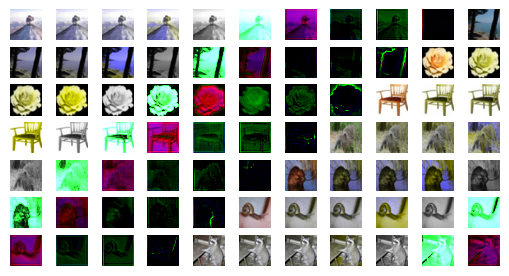

In [7]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import random
import math

import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import Image, display
mpl.use('Agg')

def compute_accuracy(logits, labels):
    correct_predictions = tf.equal(tf.argmax(tf.squeeze(logits), 1), tf.squeeze(labels))
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

def load_data(augment=True):
    (d12_data, d12_labels), (d3_data, d3_labels) = tf.keras.datasets.cifar100.load_data()

    if augment:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            validation_split=0.2
        )


    d1 = (d12_data[:25000] / 255, d12_labels[:25000], 100) 
    d2 = (d12_data[25000:] / 255, d12_labels[25000:], 100) 
    d3 = (d3_data / 255, d3_labels, 100)

    return d1, d2, d3

def run_d1(referee, d1):
    # TODO: train referee
    for epoch in range(1):
        print("EPOCH " + str(epoch))
        batch_counter = 0
        for batch in range(1):#0, len(d1[0]), referee.batch_size):
            print("Batch " + str(batch_counter))
            batch_counter += 1
            labels = d1[1][batch : batch + referee.batch_size]
            with tf.GradientTape() as tape:
                logits = referee.call(d1[0][batch : batch + referee.batch_size])
                loss = referee.loss(logits, tf.squeeze(labels))
                print("loss: " + str(loss)) 
            accuracy = compute_accuracy(logits, labels)
            print("ACCURACY: " + str(accuracy))
            gradients = tape.gradient(loss, referee.trainable_variables)
            referee.Adam.apply_gradients(zip(gradients, referee.trainable_variables))



def run_d2(corrector, referee, d2):
    # TODO: train corrector and test referee
    for epoch in range(2):
        print("EPOCH " + str(epoch))
        batch_counter = 0
        for batch in range(0, len(d2[0]), referee.batch_size):
            print("Batch " + str(batch_counter))
            batch_counter += 1
            labels = d2[1][batch : batch + referee.batch_size]
            with tf.GradientTape() as tape:
                corrected_images = corrector(d2[0][batch : batch + referee.batch_size])
                simulated_corrected_images = tf.map_fn(corrector.simulator.simulate_image, corrected_images)
                logits = referee.call(simulated_corrected_images)
                loss = referee.loss(logits, labels)
                print("loss: " + str(loss)) 
                accuracy = compute_accuracy(logits, labels)
                print("ACCURACY: " + str(accuracy))
            gradients = tape.gradient(loss, corrector.trainable_variables)
            corrector.Adam.apply_gradients(zip(gradients, corrector.trainable_variables))
            

def run_d3(corrector, referee, d3):
    # TODO: test our corrected images vs uncorrected images

    total_acc_corrected = 0
    total_acc_uncorrected = 0
    batch_counter = 0

    for batch in range(0, len(d3[0]), referee.batch_size):
        print("Batch " + str(batch_counter))
        batch_counter += 1
        corrected_images = corrector(d3[0][batch : batch + referee.batch_size])
        uncorrected_images = d3[0][batch : batch + referee.batch_size]
        labels = d3[1][batch : batch + referee.batch_size]
        corrected_pred = referee.call(corrected_images)
        uncorrected_pred = referee.call(uncorrected_images)
        acc_corrected = compute_accuracy(corrected_pred, labels)
        acc_uncorrected = compute_accuracy(uncorrected_pred, labels)
        print("Accuracy with correction: " + str(acc_corrected))
        print("Accuracy without correction: " + str(acc_uncorrected))
        total_acc_corrected += acc_corrected
        total_acc_uncorrected += acc_uncorrected

    return total_acc_corrected / batch_counter, total_acc_uncorrected / batch_counter

def main():

    # 100 as batch_size for now, change later
    batch_size = 500

    corrector_deuteranope = Corrector(batch_size, 'D')
    corrector_protanope = Corrector(batch_size, 'P')
    corrector_tritanope = Corrector(batch_size, 'T')
    corrector_achromatopsia = Corrector(batch_size, 'A')
    corrector_deuteranomaly = Corrector(batch_size, 'Dr')

    referee = Referee(batch_size)

    d1, d2, d3 = load_data()

    # testing that data loaded correctly

    # TODO: Train and test Corrector and Referee models 

    print("STARTING D1")

    # save the model so we don't have to train it again
    run_d1(referee, d1)
    referee.save_weights('../models/referee.tf')
    
    # load weights from saved model
    referee.load_weights('../models/referee.tf')
    #run for one batch to initialize params
    run_d1(referee, d1)


    print("STARTING D2")
    run_d2(corrector_deuteranope, referee, d2)
    corrector_deuteranope.save_weights('../models/corrector_deuteranope.tf')
    run_d2(corrector_protanope, referee, d2)
    corrector_protanope.save_weights('../models/corrector_protanope.tf')

    run_d2(corrector_tritanope, referee, d2)
    corrector_tritanope.save_weights('../models/corrector_tritanope.tf')
    
    run_d2(corrector_achromatopsia, referee, d2)
    corrector_achromatopsia.save_weights('../models/corrector_achromatopsia.tf')

    run_d2(corrector_deuteranomaly, referee, d2)
    corrector_deuteranomaly.save_weights('../models/corrector_deuteranomaly.tf')

    print("STARTING D3")
    accuracy_deuteranope_corrected, accuracy_deuteranope_uncorrected = run_d3(corrector_deuteranope, referee, d3)
    accuracy_protanope_corrected, accuracy_protanope_uncorrected = run_d3(corrector_protanope, referee, d3)
    accuracy_tritanope_corrected, accuracy_tritanope_uncorrected = run_d3(corrector_tritanope, referee, d3)
    accuracy_achromatopsia_corrected, accuracy_achromatopsia_uncorrected = run_d3(corrector_achromatopsia, referee, d3)
    accuracy_deuteranomaly_corrected, accuracy_deuteranomaly_uncorrected = run_d3(corrector_deuteranomaly, referee, d3)

    print("ACCURACY DEUTERANOPE CORRECTED: " + str(accuracy_deuteranope_corrected))
    print("ACCURACY DEUTERANOPE UNCORRECTED: " + str(accuracy_deuteranope_uncorrected))
    print("ACCURACY PROTANOPE CORRECTED: " + str(accuracy_protanope_corrected))
    print("ACCURACY PROTANOPE UNCORRECTED: " + str(accuracy_protanope_uncorrected))
    print("ACCURACY TRITANOPE CORRECTED: " + str(accuracy_tritanope_corrected))
    print("ACCURACY TRITANOPE UNCORRECTED: " + str(accuracy_tritanope_uncorrected))
    print("ACCURACY ACHROMATOPSIA CORRECTED: " + str(accuracy_achromatopsia_corrected))
    print("ACCURACY ACHROMATOPSIA UNCORRECTED: " + str(accuracy_achromatopsia_uncorrected))
    print("ACCURACY DEUTRERANOMALY CORRECTED: " + str(accuracy_deuteranomaly_corrected))
    print("ACCURACY DEUTRERANOMALY UNCORRECTED: " + str(accuracy_deuteranomaly_uncorrected))

    # TODO: we can now use the trained corrector models to visualize some results here
    nc = 11
    nr = 10

    fig = plt.figure()

    image = d3[0][0]
    image_idx = 0

    for i in range(88):
        ax = fig.add_subplot(nr, nc, i+1)
        ax.axis('off')

        if (i % 10 == 0):
            image = d3[0][i]
            image_idx = i
            ax.imshow(image, cmap="Greys")
        elif (i % 10 == 1):
            ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 2):
            ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 3):
            ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 4):
            ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 5):
            ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 6):
            ax.imshow(corrector_deuteranope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 10 == 7):
            ax.imshow(corrector_protanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif(i % 10 == 8):
            ax.imshow(corrector_tritanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 10 == 9):
            ax.imshow(corrector_deuteranomaly.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        else:
          ax.imshow(corrector_achromatopsia.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        

    display(fig);

    return

if __name__ == "__main__":
    main()

## Machine learning system code (color correction accuracy)

In [ ]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import random
import math

import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import Image, display
mpl.use('Agg')

def compute_accuracy(logits, labels, images):
    correct_predictions = tf.equal(tf.argmax(tf.squeeze(logits), 1), tf.squeeze(labels))
    # calculate color accuracy
    # get RGB color channels
    r, g, b = tf.split(images, num_or_size_splits=3, axis=3)
    # normalize pixel values from 0-255 to 0-1
    r_norm = tf.cast(r, dtype=tf.float32) / 255.0
    g_norm = tf.cast(g, dtype=tf.float32) / 255.0
    b_norm = tf.cast(b, dtype=tf.float32) / 255.0
    # calculate mean color value for each channel
    r_mean = tf.reduce_mean(r_norm, axis=[1, 2])
    g_mean = tf.reduce_mean(g_norm, axis=[1, 2])
    b_mean = tf.reduce_mean(b_norm, axis=[1, 2])
    # calculate distance from mean for each pixel and channel
    r_dist = tf.abs(r_norm - r_mean[:, tf.newaxis, tf.newaxis, :])
    g_dist = tf.abs(g_norm - g_mean[:, tf.newaxis, tf.newaxis, :])
    b_dist = tf.abs(b_norm - b_mean[:, tf.newaxis, tf.newaxis, :])
    # calculate mean distance across all channels
    color_dist = tf.reduce_mean(r_dist + g_dist + b_dist, axis=[1, 2, 3])
    # convert distance to accuracy (higher accuracy for lower distance)
    color_acc = 1.0 - tf.clip_by_value(color_dist, 0, 1)
    # weight color accuracy and classification accuracy equally
    return 0.5 * tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) + 0.5 * color_acc


def load_data(augment=True):
    (d12_data, d12_labels), (d3_data, d3_labels) = tf.keras.datasets.cifar100.load_data()

    if augment:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            validation_split=0.2
        )


    d1 = (d12_data[:25000] / 255, d12_labels[:25000], 100) 
    d2 = (d12_data[25000:] / 255, d12_labels[25000:], 100) 
    d3 = (d3_data / 255, d3_labels, 100)

    return d1, d2, d3

def run_d1(referee, d1):
    # TODO: train referee
    for epoch in range(1):
        print("EPOCH " + str(epoch))
        batch_counter = 0
        for batch in range(1):#0, len(d1[0]), referee.batch_size):
            print("Batch " + str(batch_counter))
            batch_counter += 1
            images = d1[0][batch : batch + referee.batch_size]
            labels = d1[1][batch : batch + referee.batch_size]
            with tf.GradientTape() as tape:
                logits = referee.call(images)
                loss = referee.loss(logits, tf.squeeze(labels))
                print("loss: " + str(loss)) 
            accuracy = compute_accuracy(logits, labels, images)
            print("ACCURACY: " + str(accuracy))
            gradients = tape.gradient(loss, referee.trainable_variables)
            referee.Adam.apply_gradients(zip(gradients, referee.trainable_variables))




def run_d2(corrector, referee, d2):
    # Train the corrector and test the referee using dataset d2
    for epoch in range(2):
        print("EPOCH " + str(epoch))
        batch_counter = 0
        for batch in range(0, len(d2[0]), referee.batch_size):
            print("Batch " + str(batch_counter))
            batch_counter += 1
            labels = d2[1][batch : batch + referee.batch_size]
            with tf.GradientTape() as tape:
                corrected_images = corrector(d2[0][batch : batch + referee.batch_size])
                simulated_corrected_images = tf.map_fn(corrector.simulator.simulate_image, corrected_images)
                logits = referee.call(simulated_corrected_images)
                loss = referee.loss(logits, labels)
                print("loss: " + str(loss)) 
                accuracy = compute_accuracy(logits, labels, corrected_images)
                print("ACCURACY: " + str(accuracy))
            gradients = tape.gradient(loss, corrector.trainable_variables)
            corrector.Adam.apply_gradients(zip(gradients, corrector.trainable_variables))


def run_d3(corrector, referee, d3):
    # Test the referee on the uncorrected and corrected images from dataset d3
    total_acc_corrected = 0
    total_acc_uncorrected = 0
    batch_counter = 0

    for batch in range(0, len(d3[0]), referee.batch_size):
        print("Batch " + str(batch_counter))
        batch_counter += 1
        corrected_images = corrector(d3[0][batch : batch + referee.batch_size])
        uncorrected_images = d3[0][batch : batch + referee.batch_size]
        labels = d3[1][batch : batch + referee.batch_size]
        corrected_pred = referee.call(corrected_images)
        uncorrected_pred = referee.call(uncorrected_images)
        acc_corrected = compute_accuracy(corrected_pred, labels)
        acc_uncorrected = compute_accuracy(uncorrected_pred, labels)
        print("Accuracy with correction: " + str(acc_corrected))
        print("Accuracy without correction: " + str(acc_uncorrected))
        total_acc_corrected += acc_corrected
        total_acc_uncorrected += acc_uncorrected

    return total_acc_corrected / batch_counter, total_acc_uncorrected / batch_counter


def main():

    # 100 as batch_size for now, change later
    batch_size = 500

    corrector_deuteranope = Corrector(batch_size, 'D')
    corrector_protanope = Corrector(batch_size, 'P')
    corrector_tritanope = Corrector(batch_size, 'T')
    corrector_achromatopsia = Corrector(batch_size, 'A')
    corrector_deuteranomaly = Corrector(batch_size, 'Dr')

    referee = Referee(batch_size)

    d1, d2, d3 = load_data()

    # testing that data loaded correctly

    # TODO: Train and test Corrector and Referee models 

    print("STARTING D1")

    # save the model so we don't have to train it again
    run_d1(referee, d1)
    referee.save_weights('../models/referee.tf')
    
    # load weights from saved model
    referee.load_weights('../models/referee.tf')
    #run for one batch to initialize params
    run_d1(referee, d1)


    print("STARTING D2")
    run_d2(corrector_deuteranope, referee, d2)
    corrector_deuteranope.save_weights('../models/corrector_deuteranope.tf')
    run_d2(corrector_protanope, referee, d2)
    corrector_protanope.save_weights('../models/corrector_protanope.tf')

    run_d2(corrector_tritanope, referee, d2)
    corrector_tritanope.save_weights('../models/corrector_tritanope.tf')
    
    run_d2(corrector_achromatopsia, referee, d2)
    corrector_achromatopsia.save_weights('../models/corrector_achromatopsia.tf')

    run_d2(corrector_deuteranomaly, referee, d2)
    corrector_deuteranomaly.save_weights('../models/corrector_deuteranomaly.tf')

    print("STARTING D3")
    accuracy_deuteranope_corrected, accuracy_deuteranope_uncorrected = run_d3(corrector_deuteranope, referee, d3)
    accuracy_protanope_corrected, accuracy_protanope_uncorrected = run_d3(corrector_protanope, referee, d3)
    accuracy_tritanope_corrected, accuracy_tritanope_uncorrected = run_d3(corrector_tritanope, referee, d3)
    accuracy_achromatopsia_corrected, accuracy_achromatopsia_uncorrected = run_d3(corrector_achromatopsia, referee, d3)
    accuracy_deuteranomaly_corrected, accuracy_deuteranomaly_uncorrected = run_d3(corrector_deuteranomaly, referee, d3)

    print("ACCURACY DEUTERANOPE CORRECTED: " + str(accuracy_deuteranope_corrected))
    print("ACCURACY DEUTERANOPE UNCORRECTED: " + str(accuracy_deuteranope_uncorrected))
    print("ACCURACY PROTANOPE CORRECTED: " + str(accuracy_protanope_corrected))
    print("ACCURACY PROTANOPE UNCORRECTED: " + str(accuracy_protanope_uncorrected))
    print("ACCURACY TRITANOPE CORRECTED: " + str(accuracy_tritanope_corrected))
    print("ACCURACY TRITANOPE UNCORRECTED: " + str(accuracy_tritanope_uncorrected))
    print("ACCURACY ACHROMATOPSIA CORRECTED: " + str(accuracy_achromatopsia_corrected))
    print("ACCURACY ACHROMATOPSIA UNCORRECTED: " + str(accuracy_achromatopsia_uncorrected))
    print("ACCURACY DEUTRERANOMALY CORRECTED: " + str(accuracy_deuteranomaly_corrected))
    print("ACCURACY DEUTRERANOMALY UNCORRECTED: " + str(accuracy_deuteranomaly_uncorrected))

    # TODO: we can now use the trained corrector models to visualize some results here
    nc = 11
    nr = 10

    fig = plt.figure()

    image = d3[0][0]
    image_idx = 0

    for i in range(77):
        ax = fig.add_subplot(nr, nc, i+1)
        ax.axis('off')

        if (i % 10 == 0):
            image = d3[0][i]
            image_idx = i
            ax.imshow(image, cmap="Greys")
        elif (i % 10 == 1):
            ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 2):
            ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 3):
            ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 4):
            ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 5):
            ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 6):
            ax.imshow(corrector_deuteranope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 10 == 7):
            ax.imshow(corrector_protanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif(i % 10 == 8):
            ax.imshow(corrector_tritanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 10 == 9):
            ax.imshow(corrector_deuteranomaly.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        else:
          ax.imshow(corrector_achromatopsia.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        

    display(fig);

    return

if _name_ == "_main_":
    main()

## Plot the pictures

the results from the previous models are plotted side by side where it shows the original image then 5 simulated images based on our defined color blindness, and then corrected images that have been altered based on the simulations.

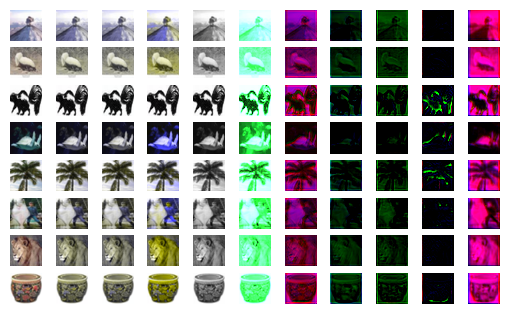

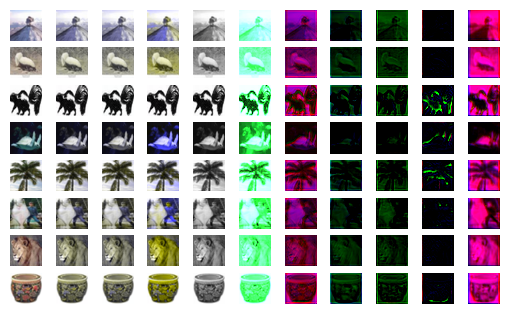

In [17]:
# 100 as batch_size for now, change later
batch_size = 500

corrector_deuteranope = Corrector(batch_size, 'D')
corrector_protanope = Corrector(batch_size, 'P')
corrector_tritanope = Corrector(batch_size, 'T')
corrector_achromatopsia = Corrector(batch_size, 'A')
corrector_deuteranomaly = Corrector(batch_size, 'Dr')

referee = Referee(batch_size)

d1, d2, d3 = load_data()

# load weights from saved model
referee.load_weights('../models/referee.tf')

corrector_deuteranope.load_weights('../models/corrector_deuteranope.tf')
    
corrector_protanope.load_weights('../models/corrector_protanope.tf')

corrector_tritanope.load_weights('../models/corrector_tritanope.tf')

corrector_achromatopsia.load_weights('../models/corrector_achromatopsia.tf')

corrector_deuteranomaly.load_weights('../models/corrector_deuteranomaly.tf')

# TODO: we can now use the trained corrector models to visualize some results here
nc = 11
nr = 10

fig = plt.figure()

image = d3[0][0]
image_idx = 0

for i in range(88):
        ax = fig.add_subplot(nr, nc, i+1)
        ax.axis('off')

        if (i % 11 == 0):
            image = d3[0][i]
            image_idx = i
            ax.imshow(image, cmap="Greys")
        elif (i % 11 == 1):
            ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 11 == 2):
            ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 11 == 3):
            ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 11 == 4):
            ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 11 == 5):
            ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 11 == 6):
            ax.imshow(corrector_deuteranope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 11 == 7):
            ax.imshow(corrector_protanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif(i % 11 == 8):
            ax.imshow(corrector_tritanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 11 == 9):
            ax.imshow(corrector_deuteranomaly.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
        elif (i % 11 == 10):
          ax.imshow(corrector_achromatopsia.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])

display(fig);

## Expanding the images

Making the images easier to view.

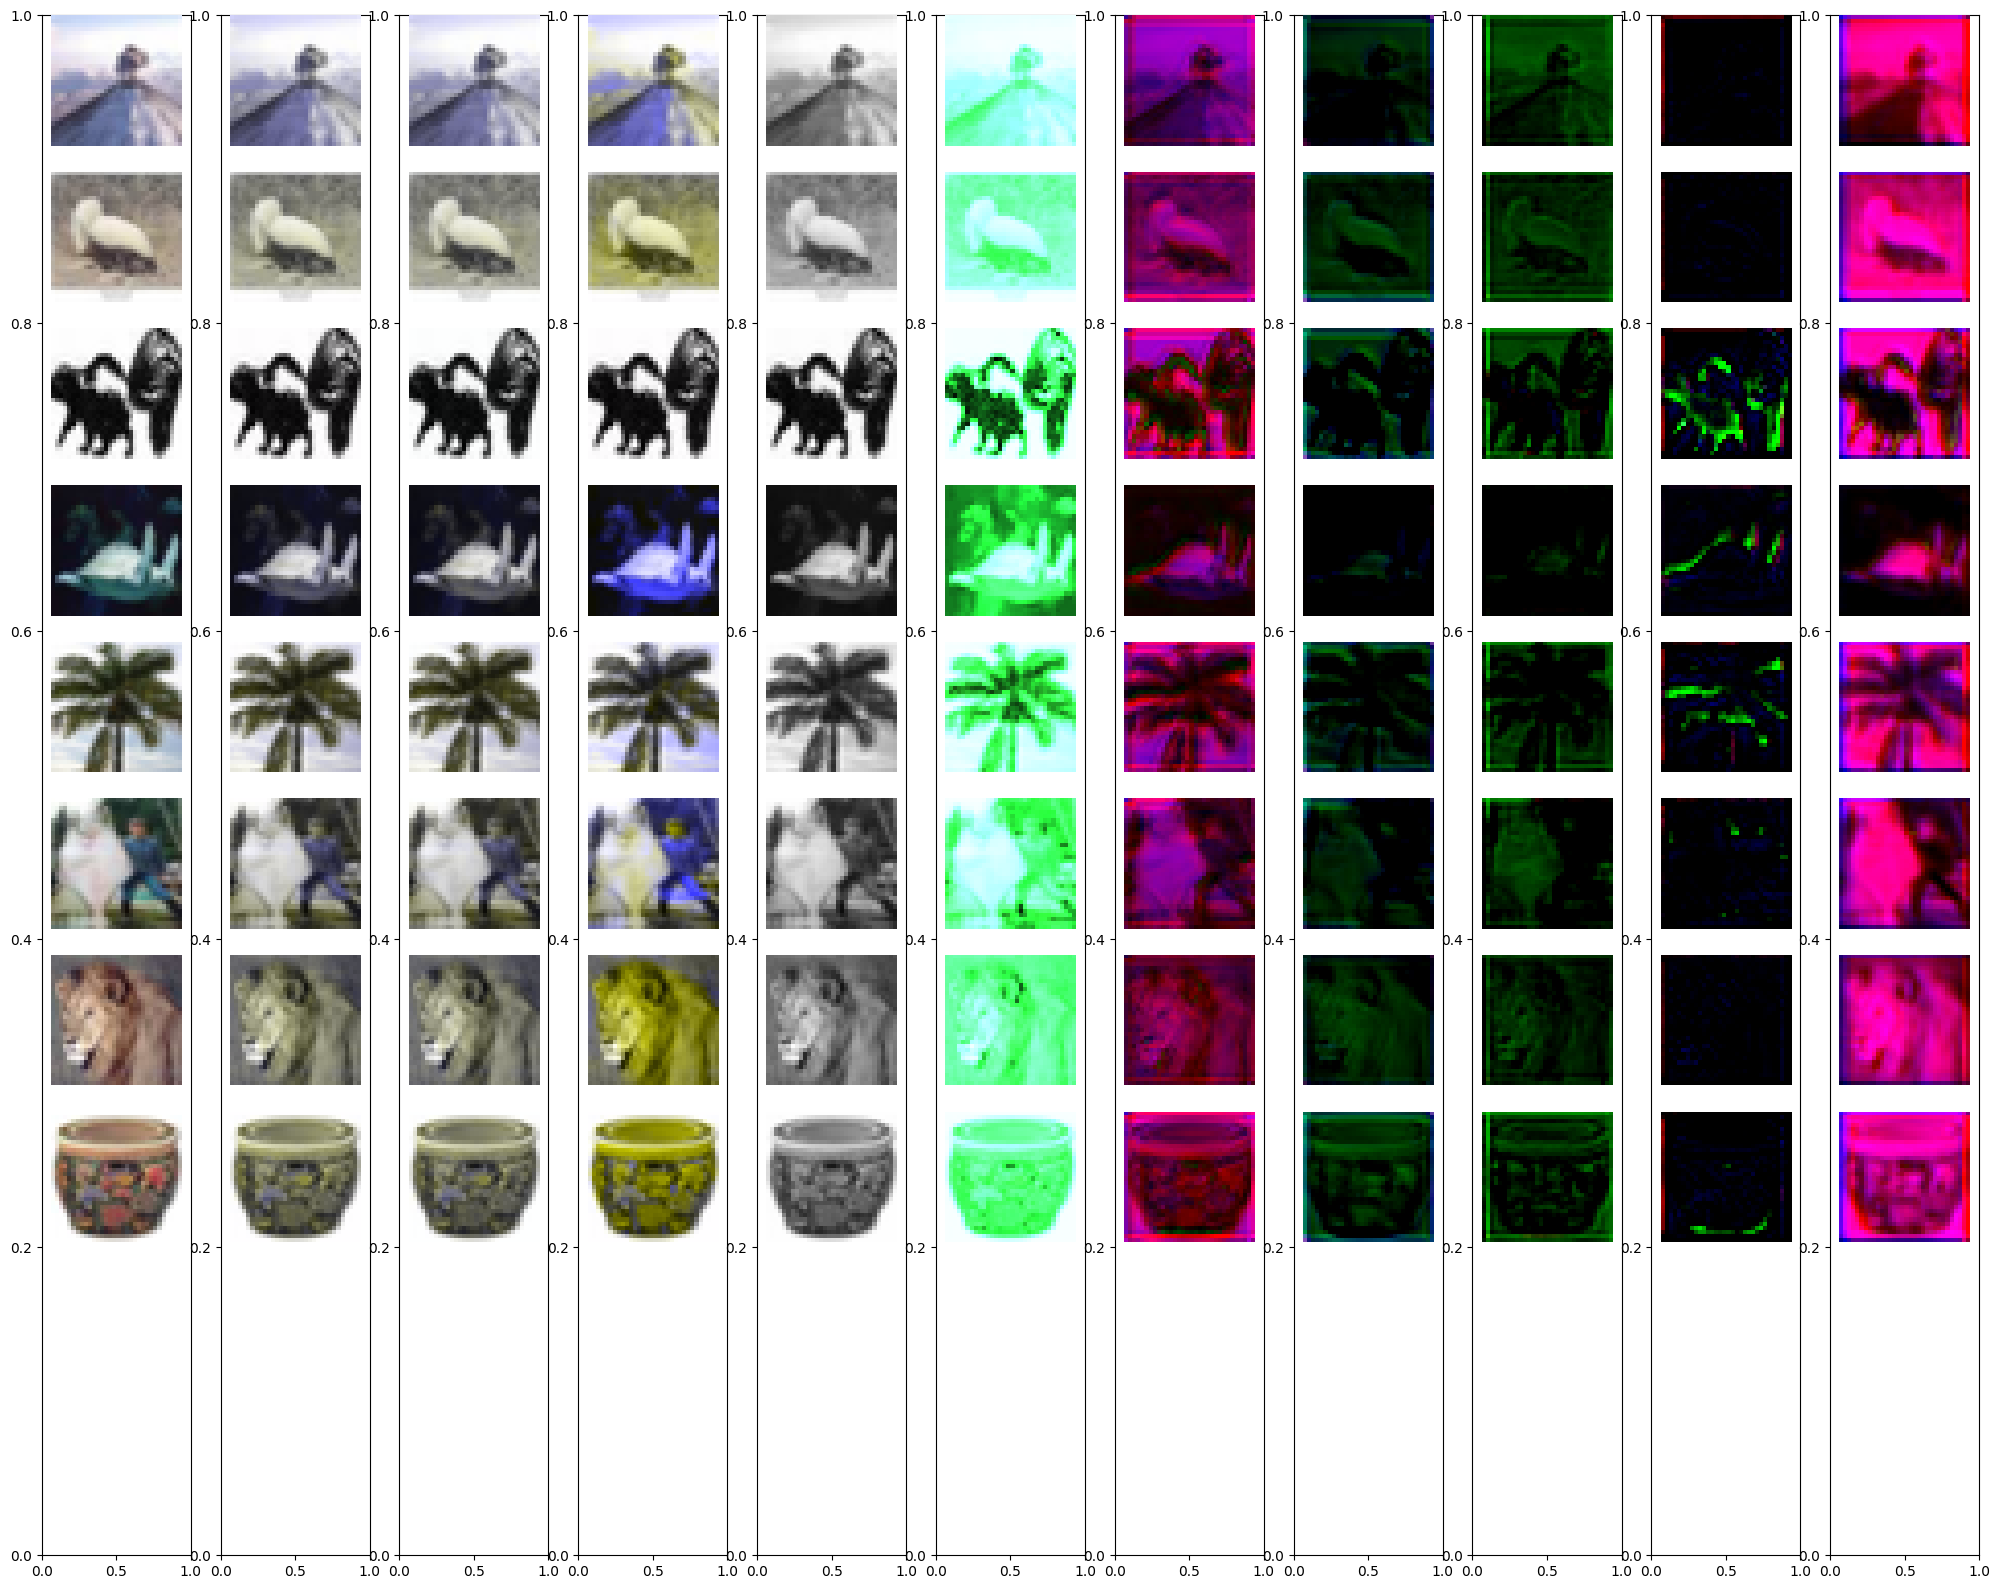

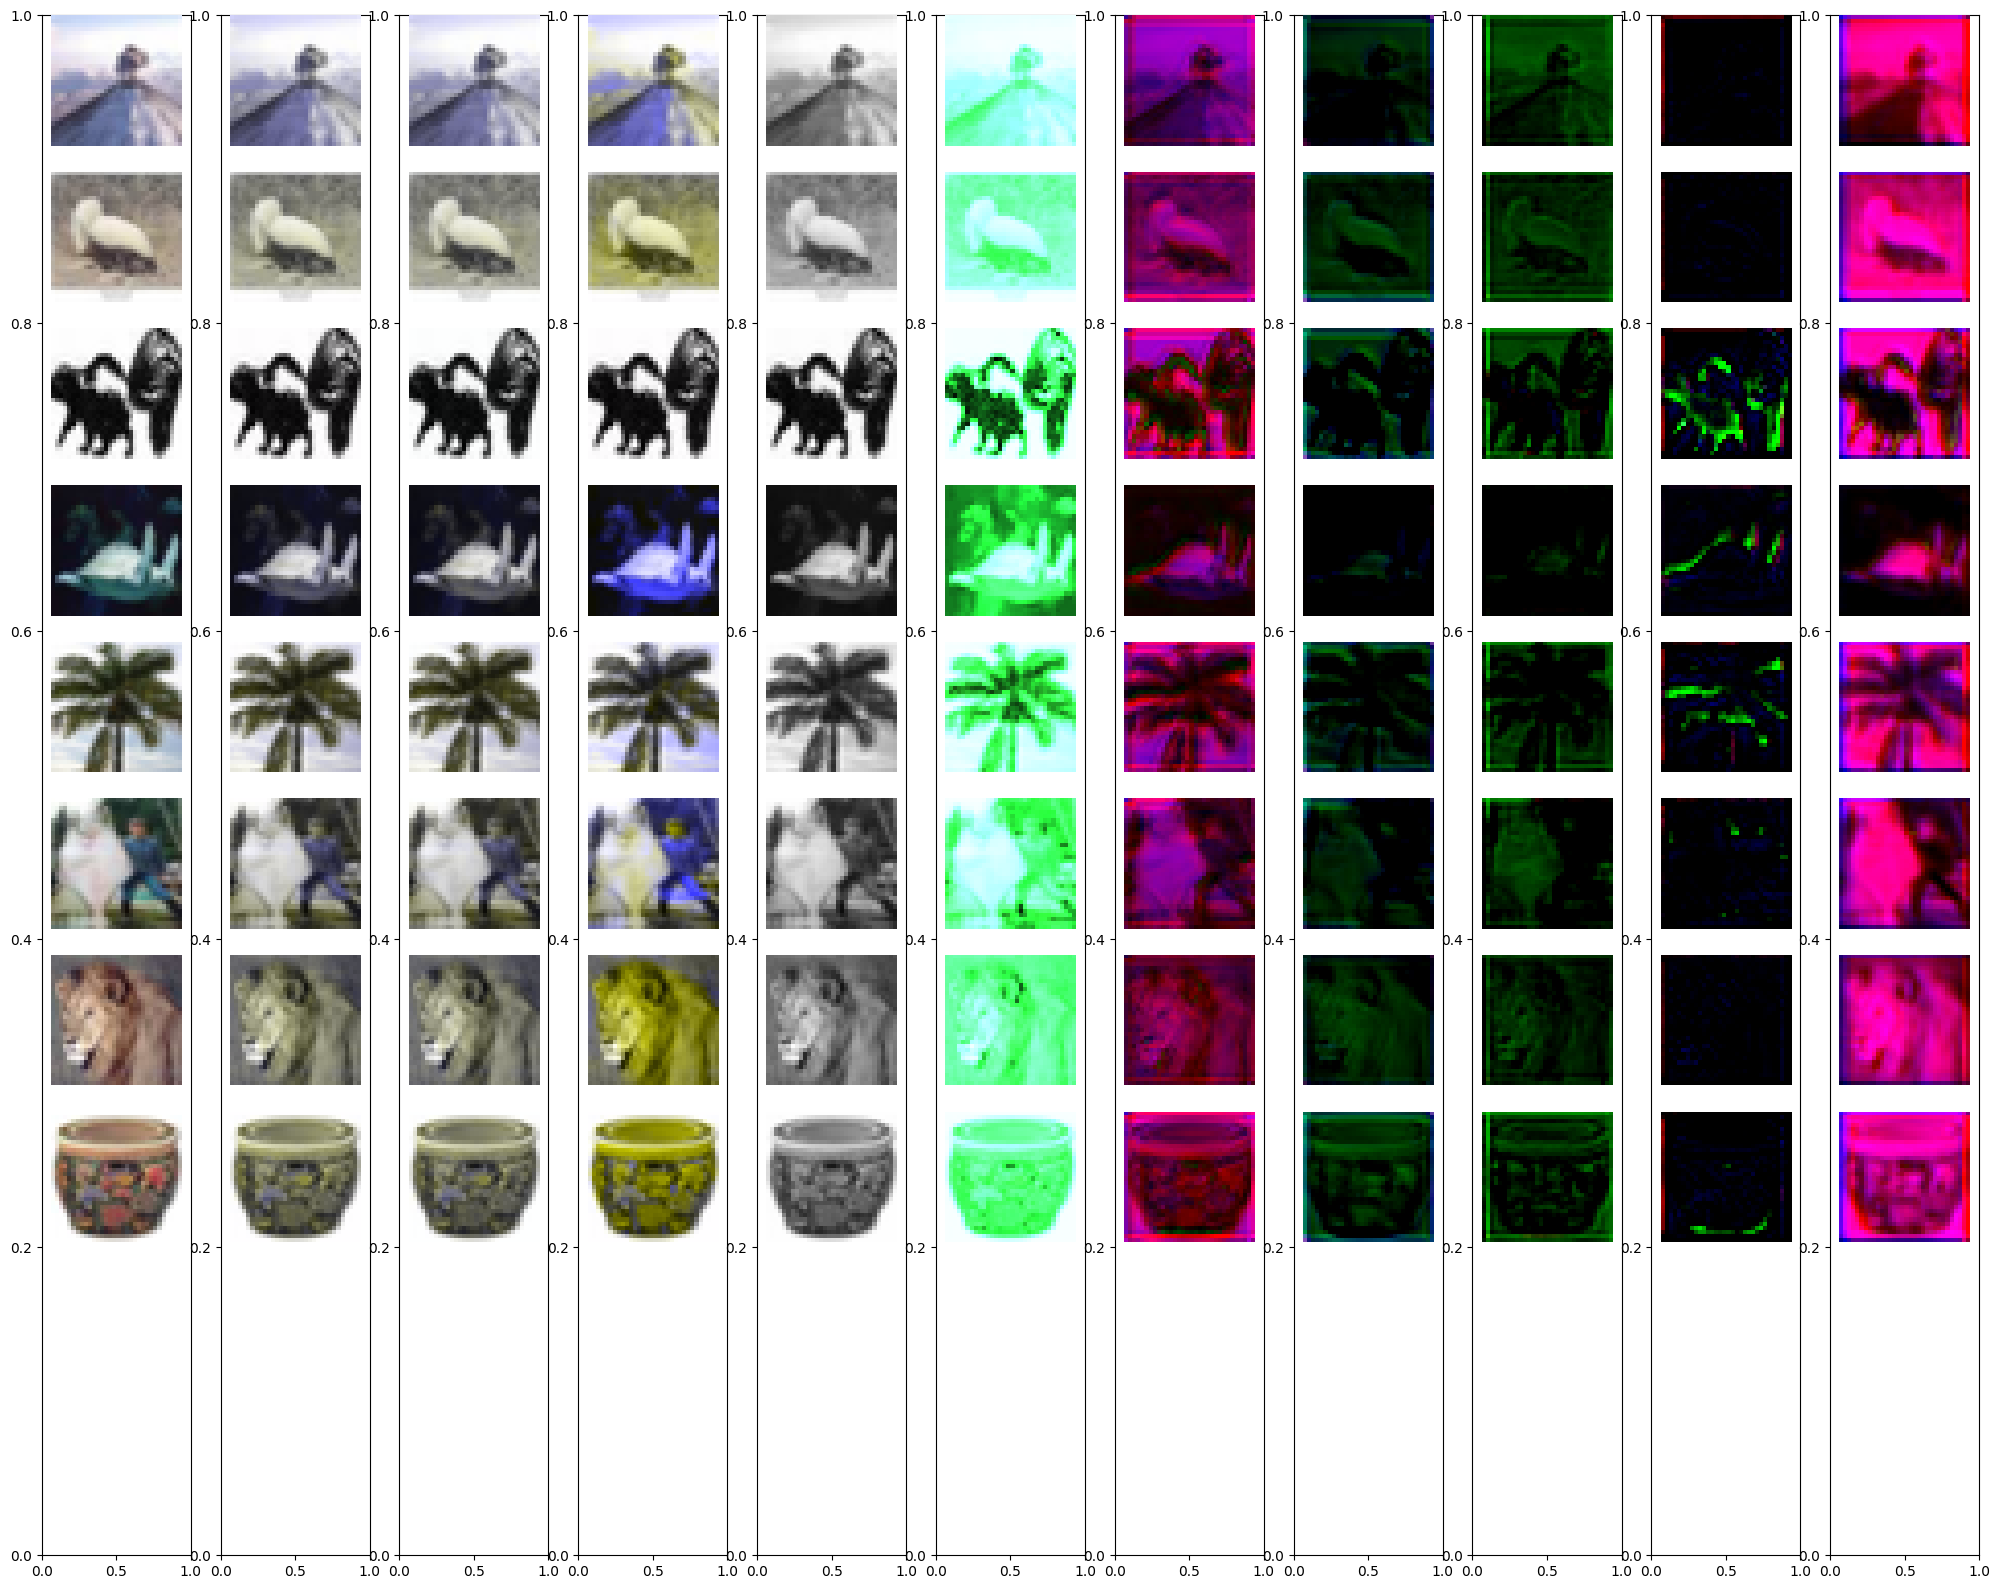

In [10]:
nc = 11
nr = 10

# Display the original and resized images
fig, axs = plt.subplots(1, 11, figsize=(25, 20))

for i in range(88):
    ax = fig.add_subplot(nr, nc, i+1)
    ax.axis('off')

    if (i % 11 == 0):
        image = d3[0][i]
        image_idx = i
        ax.imshow(image, cmap="Greys")
    elif (i % 11 == 1):
        ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
    elif (i % 11 == 2):
        ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
    elif (i % 11 == 3):
        ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
    elif (i % 11 == 4):
        ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
    elif (i % 11 == 5):
        ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
    elif (i % 11 == 6):
        ax.imshow(corrector_deuteranope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
    elif (i % 11 == 7):
        ax.imshow(corrector_protanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
    elif(i % 11 == 8):
        ax.imshow(corrector_tritanope.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
    elif (i % 11 == 9):
        ax.imshow(corrector_deuteranomaly.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])
    elif (i % 11 == 10):
        ax.imshow(corrector_achromatopsia.call(tf.cast(d3[0][image_idx : image_idx + 100], dtype=tf.float32))[0])

    # Remove the axis
    ax.set_axis_off()

display(fig)


## Install libraries for getting and displaying images from drive

In [11]:
!pip install opencv-python-headless

import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.2 MB 194 kB/s 


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tf.Tensor(255, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)
(641, 640, 3)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


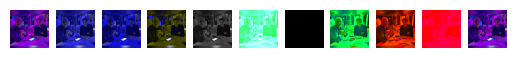

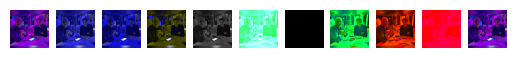

In [20]:
corrector_deuteranope = Corrector(batch_size, 'D')
corrector_protanope = Corrector(batch_size, 'P')
corrector_tritanope = Corrector(batch_size, 'T')
corrector_achromatopsia = Corrector(batch_size, 'A')
corrector_deuteranomaly = Corrector(batch_size, 'Dr')


# Define a function to convert an image to grayscale
def grayscale(image):
    return tf.image.rgb_to_grayscale(image)

nc = 11
nr = 1

fig = plt.figure()

image = tf.io.read_file('/content/drive/MyDrive/342691925_606444274530313_3210916615502428764_n.jpg')
#image = tf.io.read_file('/content/drive/MyDrive/download (1).jpg')
#image = tf.io.read_file('/content/drive/MyDrive/download (2).jpg')
#image = tf.io.read_file('/content/drive/MyDrive/download (3).jpg')
#image = tf.io.read_file('/content/drive/MyDrive/images.jpg')
#image = tf.io.read_file('/content/drive/MyDrive/images (1).jpg')
#image = tf.io.read_file('/content/drive/MyDrive/download.jpg')

# Decode the png image and convert it to a tensor
image = tf.image.decode_png(image, channels=3)

print(tf.reduce_max(image))
print(tf.reduce_min(image))

print(image.shape)

# Cast the tensor to float32 and normalize its values between 0 and 1
image = tf.cast(image, tf.float32) / 255.0

print(tf.reduce_max(image))
print(tf.reduce_min(image))

# create a batch of size 1 from the single image tensor
image_batch = tf.expand_dims(image, axis=0)


for i in range(11):
        ax = fig.add_subplot(nr, nc, i+1)
        ax.axis('off')

        if (i % 10 == 0):
            ax.imshow(image, cmap="Greys")
        elif (i % 10 == 1):
            ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 2):
            ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 3):
            ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 4):
            ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 5):
            ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 6):
            ax.imshow(corrector_deuteranope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif (i % 10 == 7):
            ax.imshow(corrector_protanope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif(i % 10 == 8):
            ax.imshow(corrector_tritanope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif (i % 10 == 9):
            ax.imshow(corrector_deuteranomaly.call(tf.cast(image_batch, dtype=tf.float32))[0])
        else:
          ax.imshow(corrector_achromatopsia.call(tf.cast(image_batch, dtype=tf.float32))[0])

display(fig);

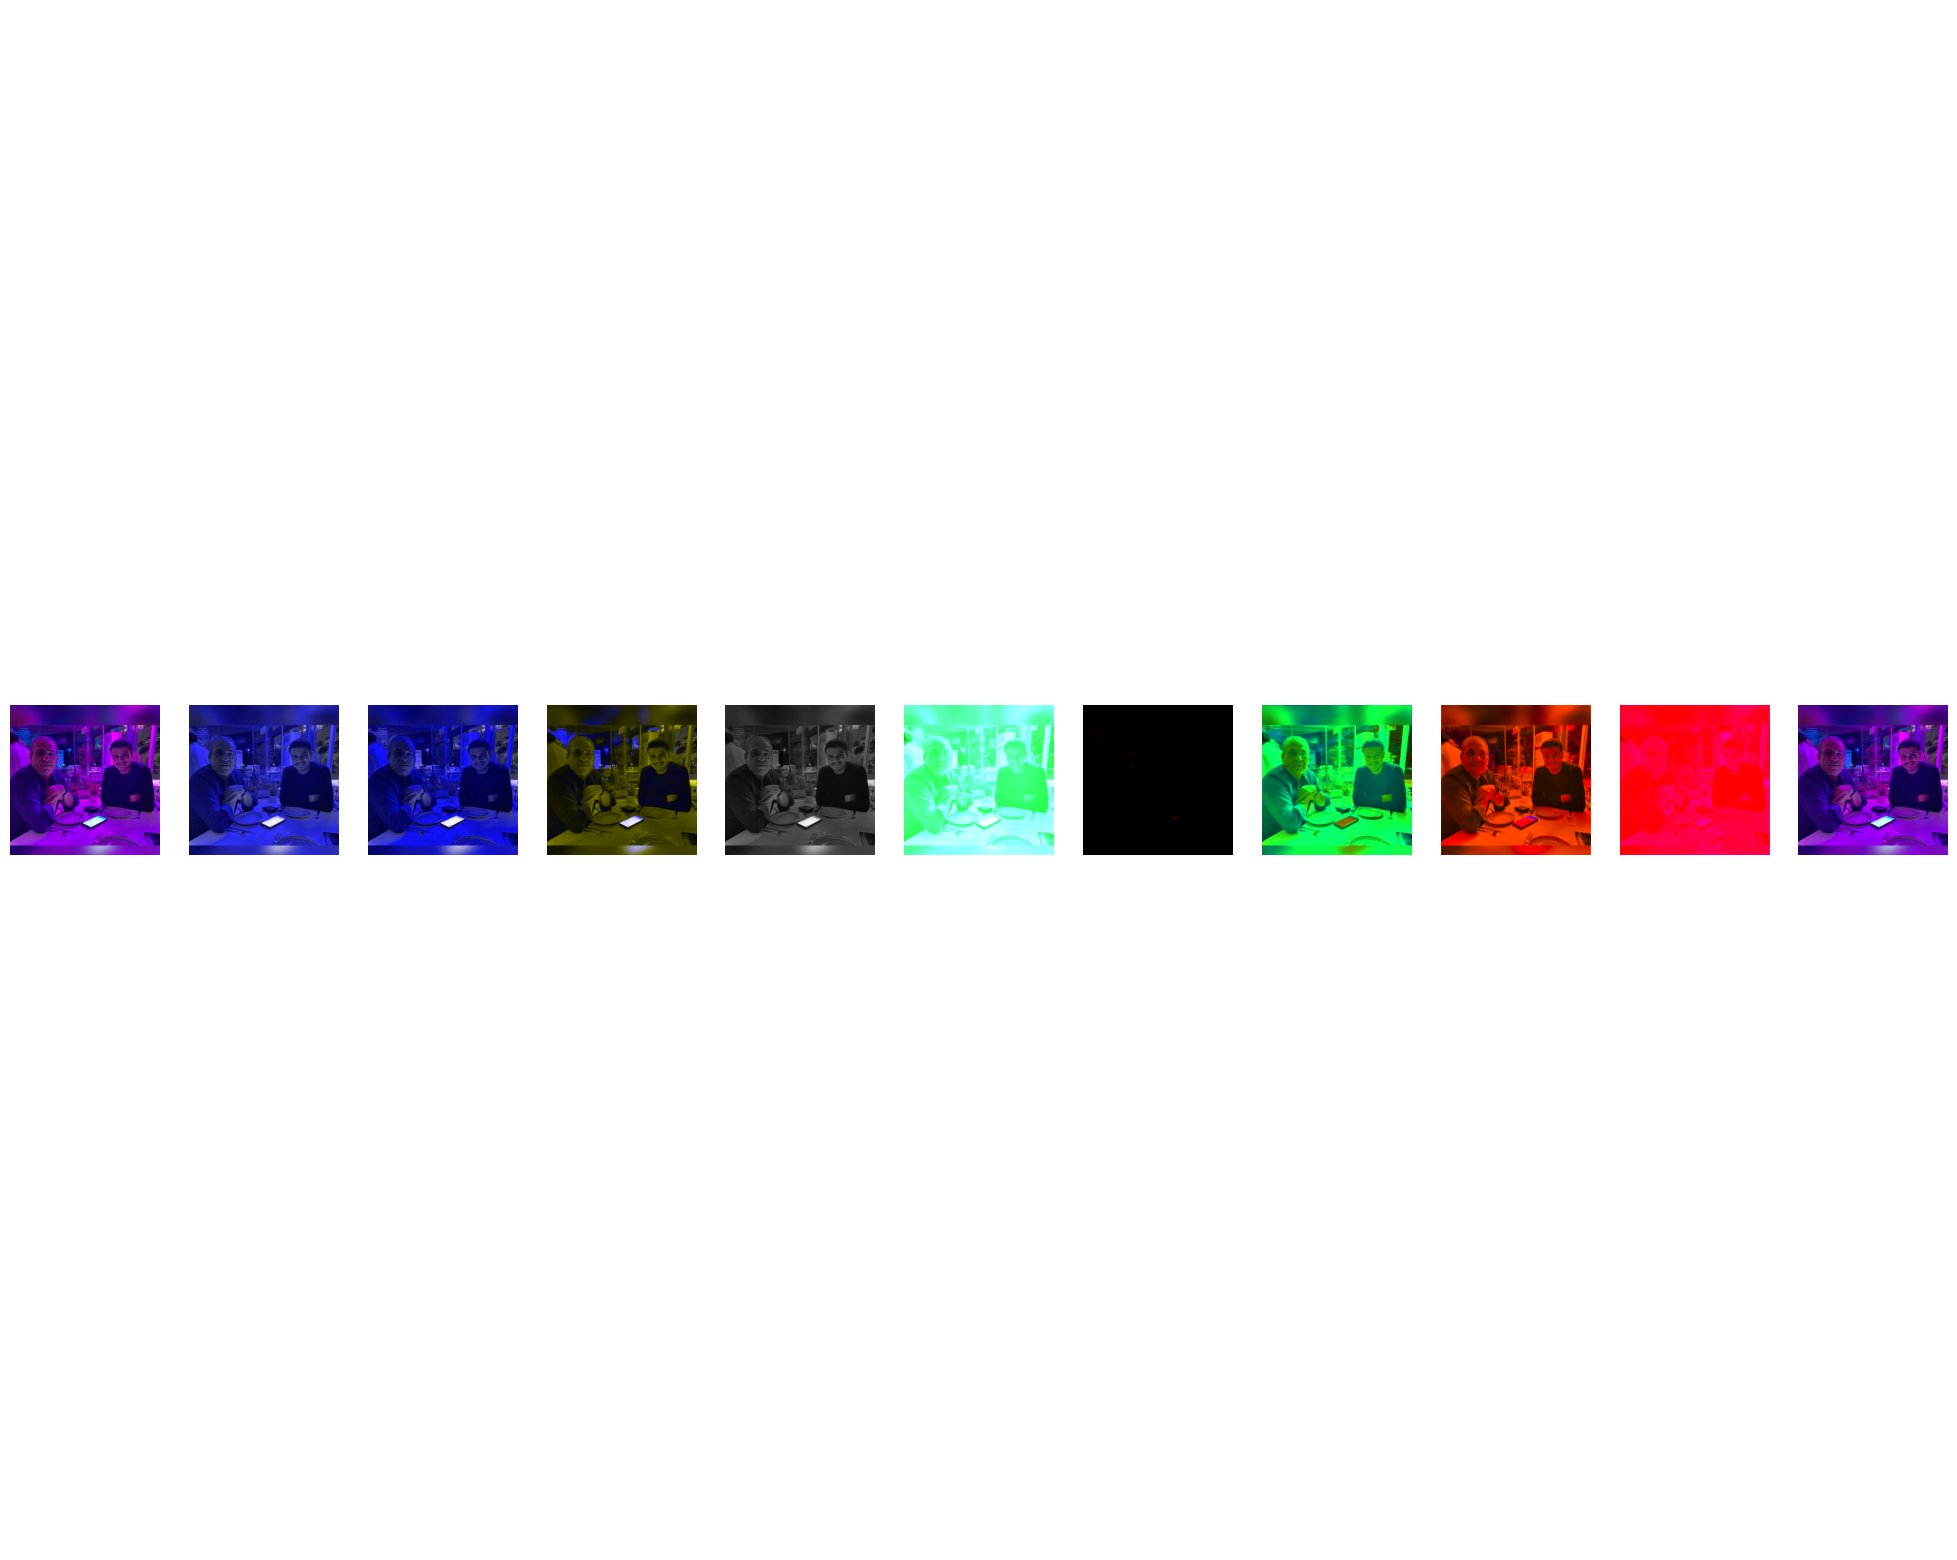

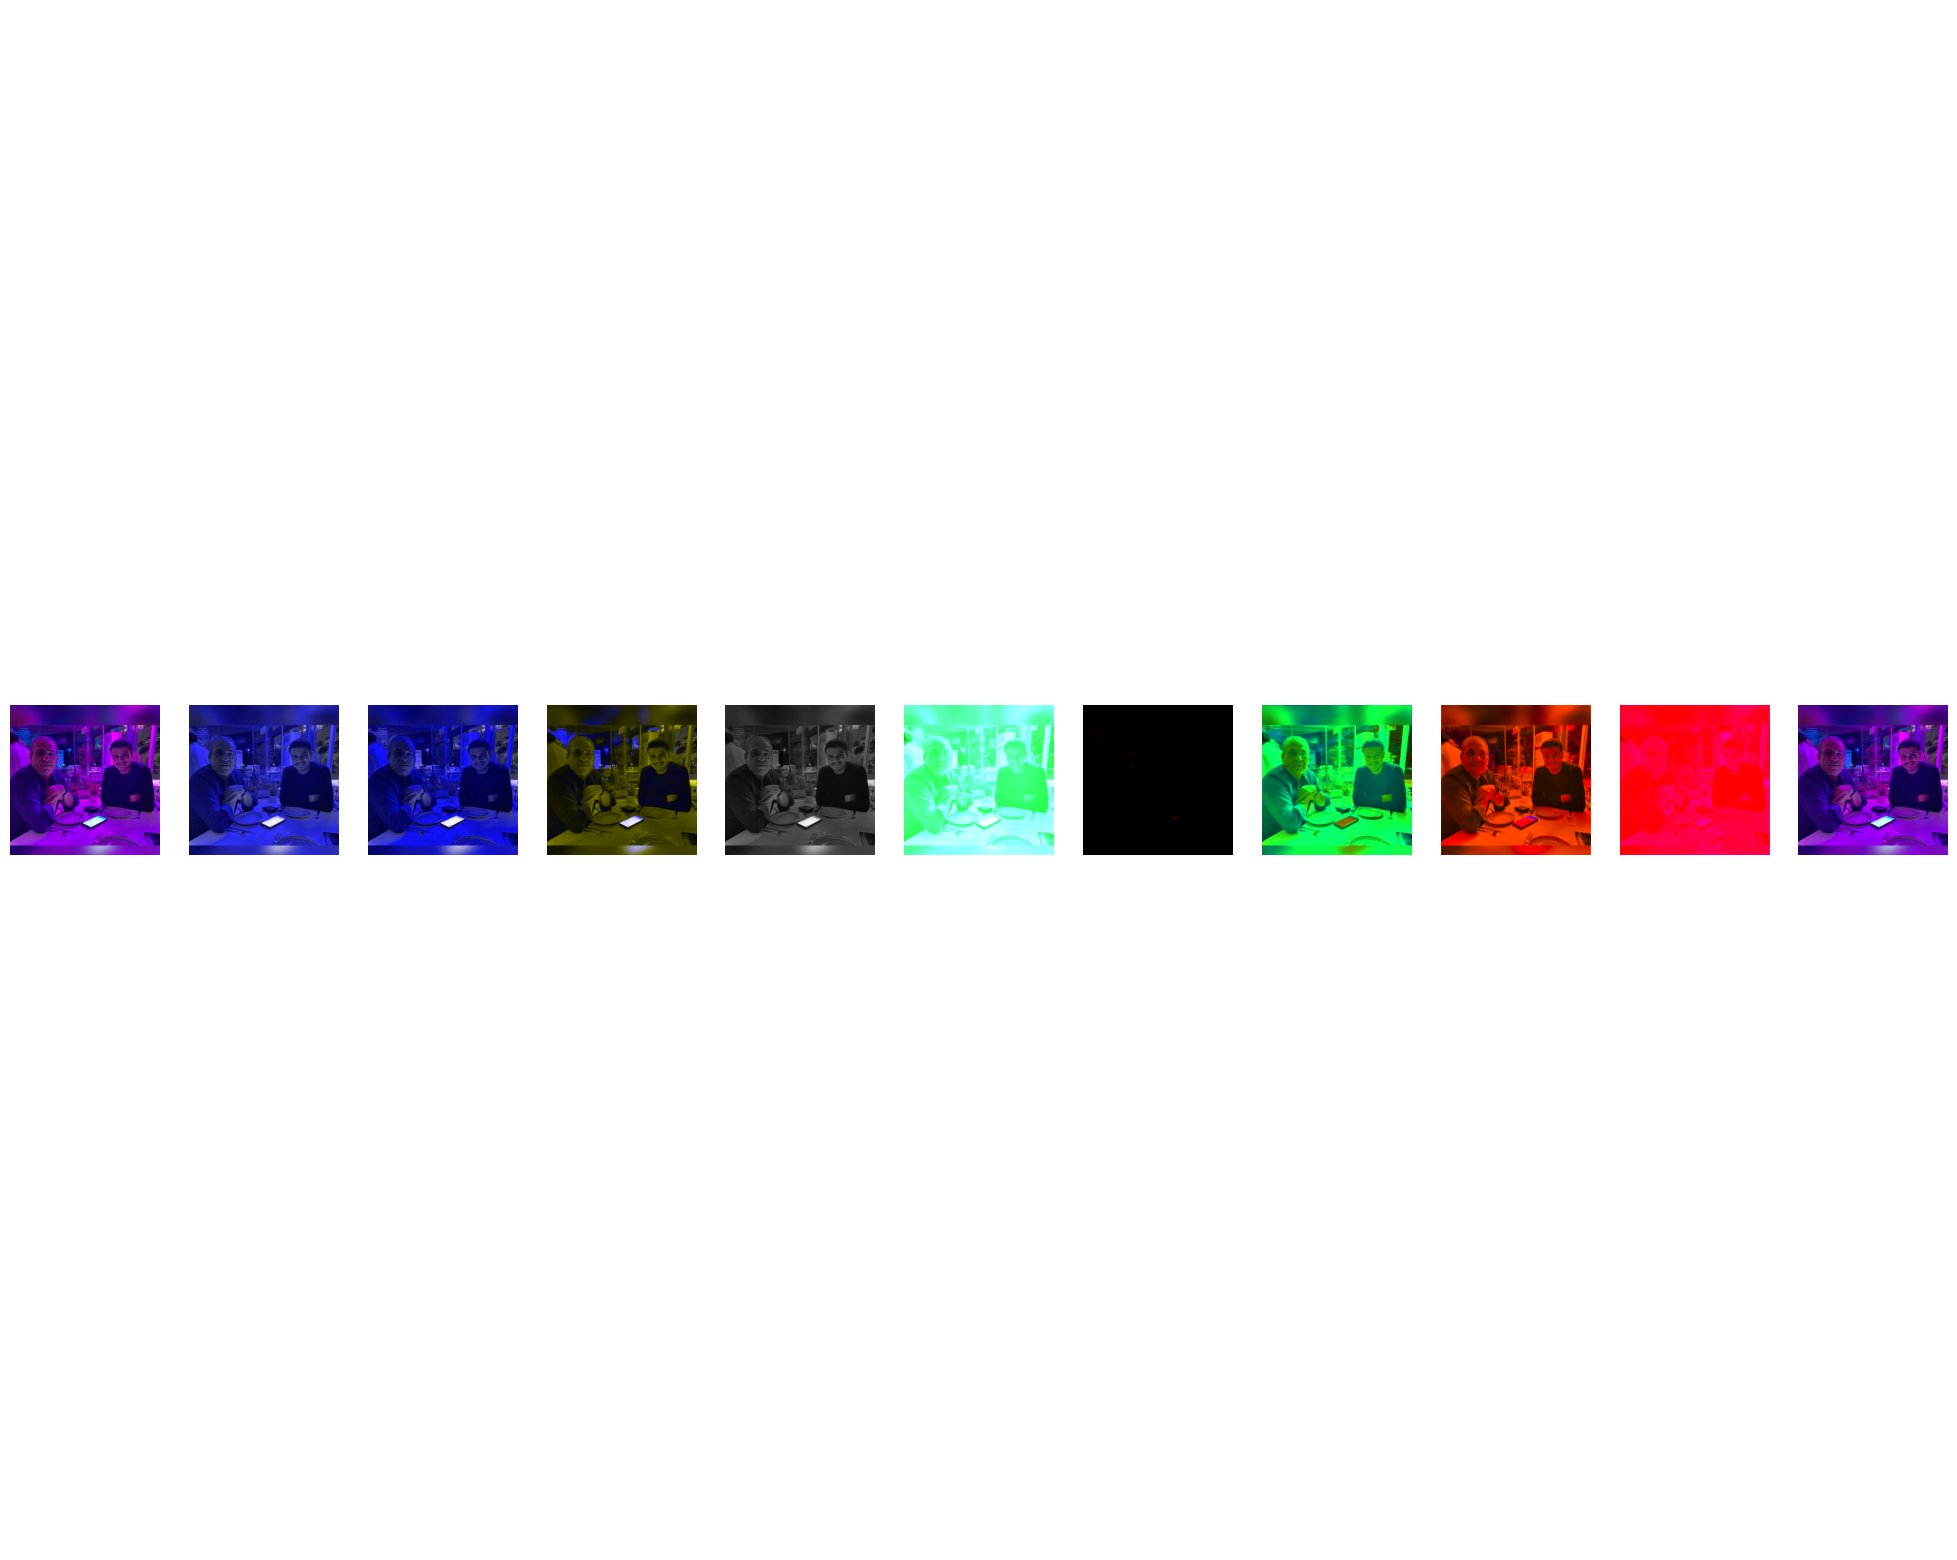

In [41]:
nc = 11
nr = 1

# Display the original and resized images
fig, axs = plt.subplots(1, 11, figsize=(25, 20))

for i in range(11):
        ax = fig.add_subplot(nr, nc, i+1)
        ax.axis('off')

        if (i % 10 == 0):
            ax.imshow(image, cmap="Greys")
        elif (i % 10 == 1):
            ax.imshow(corrector_deuteranope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 2):
            ax.imshow(corrector_protanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 3):
            ax.imshow(corrector_tritanope.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 4):
            ax.imshow(corrector_achromatopsia.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 5):
            ax.imshow(corrector_deuteranomaly.simulator.simulate_image(tf.cast(image, dtype=tf.float32)))
        elif (i % 10 == 6):
            ax.imshow(corrector_deuteranope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif (i % 10 == 7):
            ax.imshow(corrector_protanope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif(i % 10 == 8):
            ax.imshow(corrector_tritanope.call(tf.cast(image_batch, dtype=tf.float32))[0])
        elif (i % 10 == 9):
            ax.imshow(corrector_deuteranomaly.call(tf.cast(image_batch, dtype=tf.float32))[0])
        else:
          ax.imshow(corrector_achromatopsia.call(tf.cast(image_batch, dtype=tf.float32))[0])

        # Remove the axes
        axs[i].set_axis_off()

display(fig);